In [1]:
from sklearn.datasets import load_iris
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt


# 출력은 3클래스: 정수(0, 1, 2)로 되어있음

iris = load_iris()               # iris : 종류가 3가지인 꽃 => 3 class problem
x = iris.data     # 150 x 4      # 4차원 입력 : 꽃의 특징... 잎.. 색..  뭐 이런거겠지
y = iris.target   # (150,)       # 정수 : 0,1,2 
N,D = x.shape

# 입력은 4개중에 2개만 사용 + bias 추가 => 3차원 : (bias, x[0], x[1])

x = np.hstack([np.ones((N,1)), x[:,0:2]])  # design matrix  150 x 3
N,D = x.shape                              # N=150, D=3

# 출력은 binary로: 0인지 아닌지. 3class{0,1,2}에서 2class{0, (1, 2)}로 바꿈
t = np.zeros(y.shape)   # (150,)    # 정답 t (+1 or -1)
t[y == 0] = +1          # class +1 : sample은 black, decision region은 gray
t[y != 0] = -1          # class -1 : sample은 red, decision region은 white

def drawPerceptron(w, x, t_pred, t):       #그림 그리는 함수
    res = 512 
    
    x1_new = np.linspace(np.min(x[:,1]),np.max(x[:,1]),res)
    x2_new = np.linspace(np.min(x[:,2]),np.max(x[:,2]),res)
    xx1_new,xx2_new = np.meshgrid(x1_new,x2_new)
    
    y_new = w[0] + w[1]*xx1_new + w[2]*xx2_new
    
    id_misclass = np.where(t_pred*t < 0)        # 잘못 분류된 애들 형광테두리

    cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
    cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])
    
    plt.figure()
    plt.pcolormesh(xx1_new, xx2_new, y_new > 0, cmap = cmap_region, vmin = 0.0, vmax = 1.0)
    plt.scatter(x[:,1], x[:,2], c = t, s = 20, cmap = cmap_sample, vmin = -1, vmax = +1)
    plt.scatter(x[id_misclass,1], x[id_misclass,2], s = 50, marker = 'o', facecolor = 'none', edgecolor = 'cyan')

In [ ]:
# a = iris.data
# b = iris.target
# print(a.shape)
# print(b.shape)
# print(a)
# print(b)


150 3


In [1]:
# 선택한 2개 입력 + bias = 3차원 입력
w = np.array([-10, 1.0, 1.5])                      # 초기 파라미터
y_pred = x.dot(w)                  # (150,)
t_pred = np.sign(y_pred)           # (150,)        # 예측 t (+1 or -1)    #부호함수 sign

drawPerceptron(w, x, t_pred, t)

NameError: name 'np' is not defined

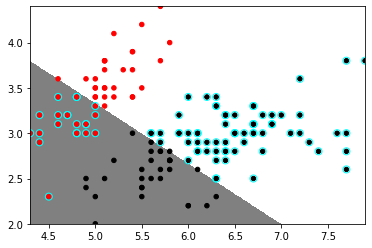

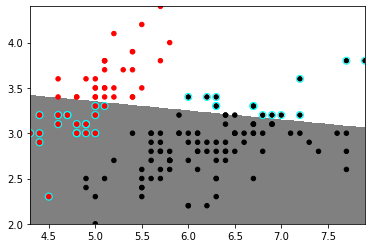

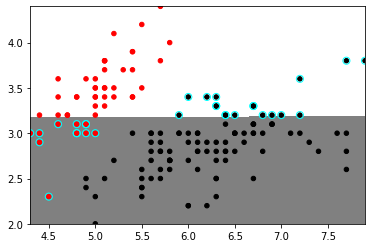

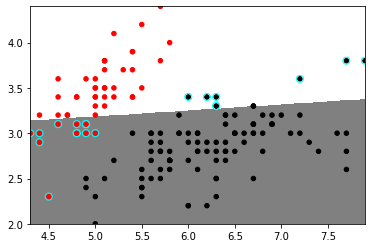

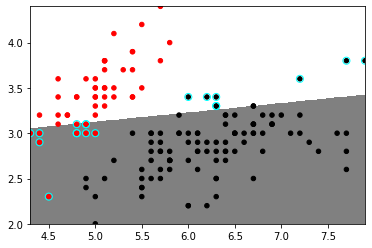

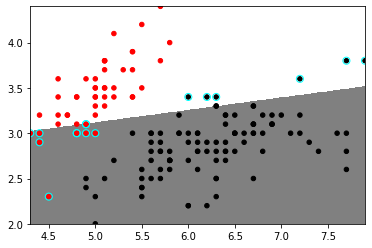

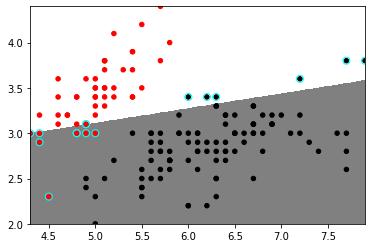

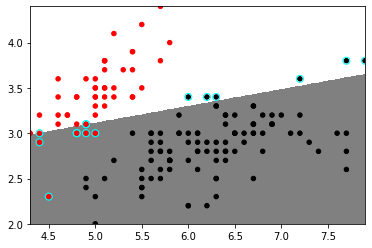

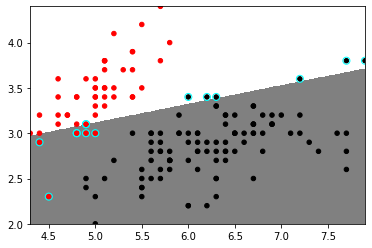

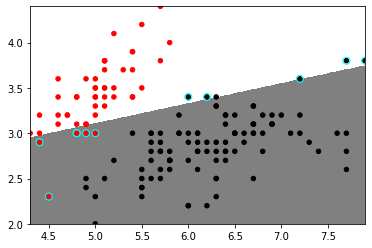

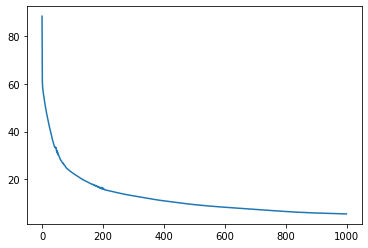

In [16]:
# perceptron, batch gradient descent

# hyperparameter
eta = 5e-4          # learning rate
maxEpoch = 1000     

cost = []

# initialization
w = np.array([-10, 1.0, 1.5])

for epoch in range(maxEpoch):

    # w, x -> prediction
    y_pred = x.dot(w)              # (150,)
    t_pred = np.sign(y_pred)       # (150,)

    # visualize
    if epoch % 100 == 0:        # 1000번은 너무 많으니까 100번에 한번씩만 그려줘
        drawPerceptron(w, x, t_pred, t)
    
    # misclassified patterns
    id_misclass = np.where(t_pred*t < 0)[0]           # misclass 인덱스 반환 # 원래 식은 t_pred 대신 y_pred # sign함수 취한 후의 값으로 계산해도 상관없으므로
    # id_misclass = np.random.permutation(id_misclass)  # 랜덤으로 섞는 코드. 여기선 의미없음  

    # cost
    cost.append(-np.sum(y_pred[id_misclass]*t[id_misclass]))
    
    # gradient descent
    # misclass 한 번에 update
    if id_misclass.size == 0:
        break
    for n in id_misclass :
      grad = - t[n] * x[n,:]     
      w = w - eta * grad        # w = w + eta*t[n]*x[n,:]
    
    
    
plt.figure()
plt.plot(cost)

In [ ]:
# perceptron, stochastic gradient descent

# hyperparameter
eta = 5e-3 # learning rate
maxIteration = 5000

cost = []

# initialization
w = np.array([-10, 1.0, 1.5])

for iteration in range(maxIteration):
    # w, x -> prediction
    y_pred = x.dot(w)
    t_pred = np.sign( y_pred )
    
#     # visualize
#     if epoch % 100 == 0:
#         drawPerceptron(w, x, t_pred, t)

    # misclassified pattern
    id_misclass = np.where( y_pred * t < 0 )[0]
    id_misclass = np.random.permutation(id_misclass)

    # cost
    cost.append(-np.sum( y_pred[id_misclass]*t[id_misclass] ))

    if id_misclass.size > 0:
        grad = t[id_misclass[0]] * x[id_misclass[0],:]
        w = w + eta * grad        
    else:
        break
        
plt.figure()
plt.plot(cost)

drawPerceptron(w, x, t_pred, t)

In [9]:
# class +1 : sample은 black, decision region은 gray
# class 0: sample은 red, decision region은 white
t = np.zeros(y.shape)
t[y == 0] = +1
t[y != 0] = 0

def sigmoid(x):                          # sign함수 대신 sigmoid함수 사용. [0,1] 연속적인 출력
    return 1 / (1 +np.exp(-x))

def drawLogistic(w, x, y, t):            # 똑같은데 misclass 굳이 분류안해도 됨
    res = 512 
    
    x1_new = np.linspace(np.min(x[:,1]),np.max(x[:,1]),res)
    x2_new = np.linspace(np.min(x[:,2]),np.max(x[:,2]),res)
    xx1_new,xx2_new = np.meshgrid(x1_new,x2_new)
    
    a_new = w[0] + w[1]*xx1_new + w[2]*xx2_new    
    y_new = sigmoid(a_new)

    cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
    cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])
    
    plt.figure()
    plt.pcolormesh(xx1_new, xx2_new, y_new > 0.5, cmap = cmap_region, vmin = 0.0, vmax = 1.0)
    plt.scatter(x[:,1], x[:,2], c = t, s = 20, cmap = cmap_sample, vmin = 0, vmax = +1)

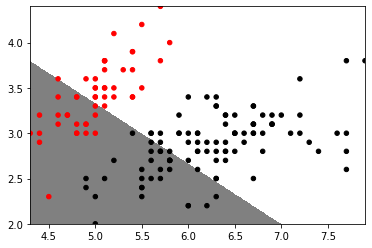

In [10]:
w = np.array([-10, 1.0, 1.5])
a_pred = x.dot(w)
y_pred = sigmoid(a_pred)
drawLogistic(w, x, y_pred, t)

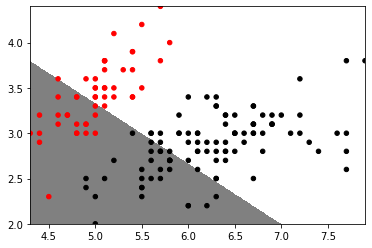

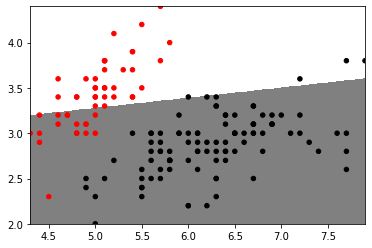

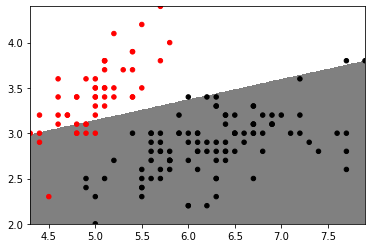

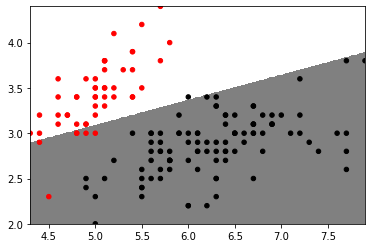

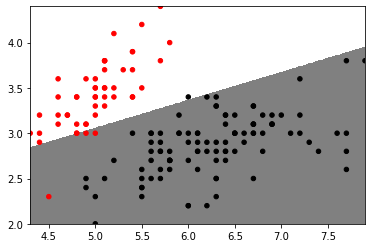

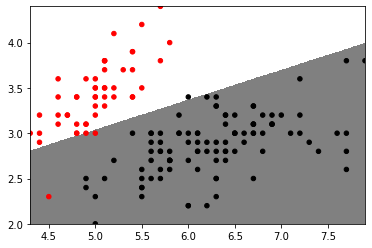

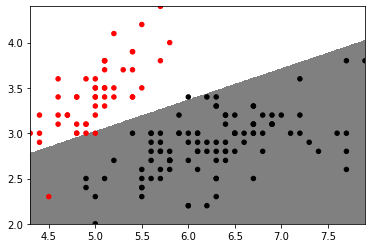

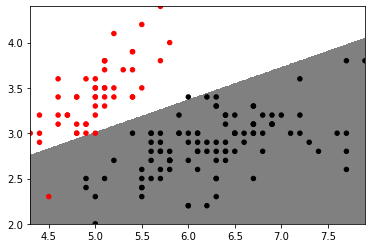

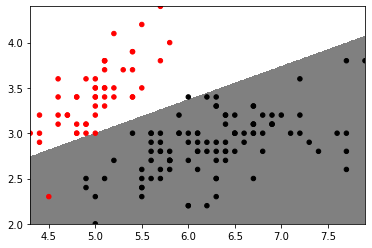

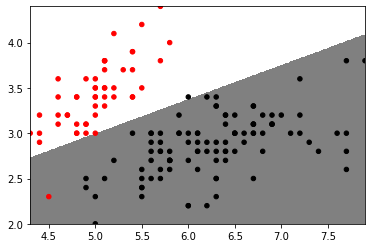

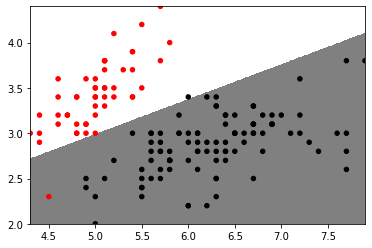

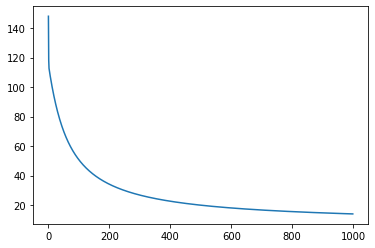

In [11]:
# logistic regression, batch gradient descent

# hyperparameter
eta = 1e-3
maxEpoch = 1000

cost = []

# initialize
w = np.array([-10, 1.0, 1.5])

for epoch in range(maxEpoch):    

    # prediction
    a_pred = x.dot(w)
    y_pred = sigmoid(a_pred)    
    
    # visualize
    if epoch % 100 == 0:                 
        drawLogistic(w, x, y_pred, t)

        
    # gradient descent

    #   grad = np.zeros(3)
    #   for n in range(N):
    #       grad += (y_pred[n] - t[n])*x[n,:].reshape(-1)
    #   맞는 방법인데, 비효율적인 for문은 없앨 수 있으면 없애는게 좋다
    #   벡터와 행렬 단위에서 끝낼 수 있다

    grad = (y_pred - t).reshape(1,-1).dot(x).reshape(-1)
    #              1 x 150    x      150 x 3  -> 1 x 3 인데 reshape(-1) => (3, ) : 1차원 배열. 벡터
    w = w - eta*grad
    
    # cost (cross-entropy)
    # t_n log y_n + (1-t_n) log(1-t_n)
    cost.append( -np.sum( t*np.log(y_pred) + (1 - t)*np.log(1 - y_pred) ) )

drawLogistic(w, x, y_pred, t)
plt.figure()
plt.plot(cost)